#Kaggle dataset download

In [ ]:
from google.colab import files
files.upload() #uploading api

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c acea-water-prediction

In [ ]:
mv * /content/water

#Acnea Water Prediction
Data exploration

In [31]:
import pandas as pd
import numpy as np
#pip install odfpy - install ods support

In [32]:
ls

Aquifer_Auser.csv         Lake_Bilancino.csv
Aquifer_Doganella.csv     River_Arno.csv
Aquifer_Luco.csv          Water_Spring_Amiata.csv
Aquifer_Petrignano.csv    Water_Spring_Lupa.csv
dataset_description.ods   Water_Spring_Madonna_di_Canneto.csv
dataset_description.xlsx


In [170]:
info = pd.read_excel('dataset_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[5])
info['Dataset_Feature_Value'][22:25]

Database                                              River_Arno
Description    Information about Arno river. The Arno is the ...
Output                                 Hydrometry_Nave_di_Rosano
Name: 5, dtype: object


,Waterbody,Field,Can Be Positive Value,Can Be Negative Value,Can Be Absolute Value
22,ARNO,Rainfall_X,Yes,No,Yes
23,NaN,Temperature_Y,Yes,Yes,No
24,NaN,Hydrometry_Z,Yes,Yes,No


In [172]:
info['Datasets_Feature_Description'].iloc[47:55]

,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
47,ARNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
49,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
50,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero..."
51,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Firenze
52,Hydrometry_Z,Real Number,"It indicates the river level, expressed in met...",NaN,NaN,NaN,Z,Nave_di_Rosano
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][48])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][49])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][50])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][51])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][52])

Description
Uniquely identifies a day (Primary Key)
It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the river level, expressed in meters (m), detected by the hydrometric station Z


In [34]:
river = pd.read_csv('River_Arno.csv')
river.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [178]:
df = river
df.fillna(0,inplace=True)
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
1,04/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
2,05/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
3,06/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.43,0.31
4,07/06/2002,0.0,0.0,0.0,0.0,0.0,0.0,249.44,0.31


In [73]:
#getting number of rows and date of first datapoint with non-0 data for every column
for i in ['Rainfall_S_Piero',	'Rainfall_Mangona',	'Rainfall_S_Agata',
          'Rainfall_Cavallina',	'Rainfall_Le_Croci',	'Temperature_Le_Croci']:
  query_0 = df.query(i+'!= 0')
  print(i, query_0.shape[0], query_0.iloc[0].loc['Date'])

Rainfall_S_Piero 2347 05/01/2004
Rainfall_Mangona 2204 08/01/2004
Rainfall_S_Agata 2271 01/01/2004
Rainfall_Cavallina 1902 09/01/2004
Rainfall_Le_Croci 2247 09/01/2004
Temperature_Le_Croci 6024 02/01/2004


In [97]:
#using subset of df from date : 09/01/2004 
data = df.iloc[df.loc[df['Date']=='09/01/2004'].index[0]:]
print(data.shape)
data.head()

(6018, 9)


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
585,09/01/2004,4.6,5.8,3.8,5.6,7.8,5.55,251.49,0.5
586,10/01/2004,0.0,0.0,0.0,0.0,0.0,6.10,251.52,0.5
587,11/01/2004,0.0,0.0,0.0,0.0,0.0,6.25,251.53,0.5
588,12/01/2004,1.8,1.6,1.2,3.4,3.6,6.70,251.55,0.5
589,13/01/2004,0.4,2.6,0.8,1.2,0.6,8.60,251.58,0.5


In [98]:
#amount of data with no non-zero value
data = df.loc[(df['Rainfall_S_Piero']!=0)&(df['Rainfall_Mangona']!=0)&
              (df['Rainfall_S_Agata']!=0)&(df['Rainfall_Cavallina']!=0)&
              (df['Rainfall_Le_Croci']!=0)]
print(data.shape)
data.head()

(1535, 9)


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
585,09/01/2004,4.6,5.8,3.8,5.6,7.8,5.55,251.49,0.5
588,12/01/2004,1.8,1.6,1.2,3.4,3.6,6.70,251.55,0.5
589,13/01/2004,0.4,2.6,0.8,1.2,0.6,8.60,251.58,0.5
591,15/01/2004,7.0,13.0,10.0,8.8,6.0,9.10,251.64,0.5
592,16/01/2004,3.2,11.4,4.6,5.6,4.4,5.45,251.70,0.5


In [181]:
#data subset containing rainfall measure from atleast 1 station
data_rain = df.loc[(df['Rainfall_S_Piero']!=0)|(df['Rainfall_Mangona']!=0)|
              (df['Rainfall_S_Agata']!=0)|(df['Rainfall_Cavallina']!=0)|
              (df['Rainfall_Le_Croci']!=0)]
print(data_rain.shape)

(3045, 9)


In [204]:
data_rain['total_rain'] = data_rain.iloc[:,1:6].sum(axis=1)
data_rain.rename(columns = {'Temperature_Le_Croci':'temperature'}, inplace=True)
data_rain.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,temperature,Lake_Level,Flow_Rate,total_rain
577,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.00,251.14,0.5,0.4
581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,0.2
584,08/01/2004,0.0,0.8,0.0,0.0,0.0,3.35,251.45,0.5,0.8
585,09/01/2004,4.6,5.8,3.8,5.6,7.8,5.55,251.49,0.5,27.6
588,12/01/2004,1.8,1.6,1.2,3.4,3.6,6.70,251.55,0.5,11.6


In [213]:
combined = data_rain.iloc[:,[0,6,7,9]].copy()
combined.head()

,Date,temperature,Lake_Level,total_rain
577,01/01/2004,0.00,251.14,0.4
581,05/01/2004,0.90,251.37,0.2
584,08/01/2004,3.35,251.45,0.8
585,09/01/2004,5.55,251.49,27.6
588,12/01/2004,6.70,251.55,11.6


observing feature variation wrt to each other

In [237]:
print(data_rain['Rainfall_S_Piero'].corr(data_rain['Lake_Level']))
print(data_rain['Rainfall_Cavallina'].corr(data_rain['Lake_Level']))
print(data_rain['Rainfall_Le_Croci'].corr(data_rain['Lake_Level']))
print(data_rain['Rainfall_Mangona'].corr(data_rain['Lake_Level']))
print(data_rain['Rainfall_S_Agata'].corr(data_rain['Lake_Level']))

-0.027102933550330947
-0.027933515421345992
-0.011962318469735105
-0.0241549684653646
-0.024284180547987966


In [232]:
print('temp correlation w level - {} \n rain correlation w level - {} \n temp correlation w rain - {} \n'.format(combined['temperature'].corr(combined['Lake_Level']),
combined['total_rain'].corr(combined['Lake_Level']),
combined['temperature'].corr(combined['total_rain'])))
'''
As evident below, there is correlation. However, it is miniscule and likely unimportant.
'''

temp correlation w level - 0.0003762703672698083 
 rain correlation w level - -0.024225410555472424 
 temp correlation w rain - -0.044535402811222174 



In [214]:
import matplotlib.pyplot as plt
%matplotlib inline

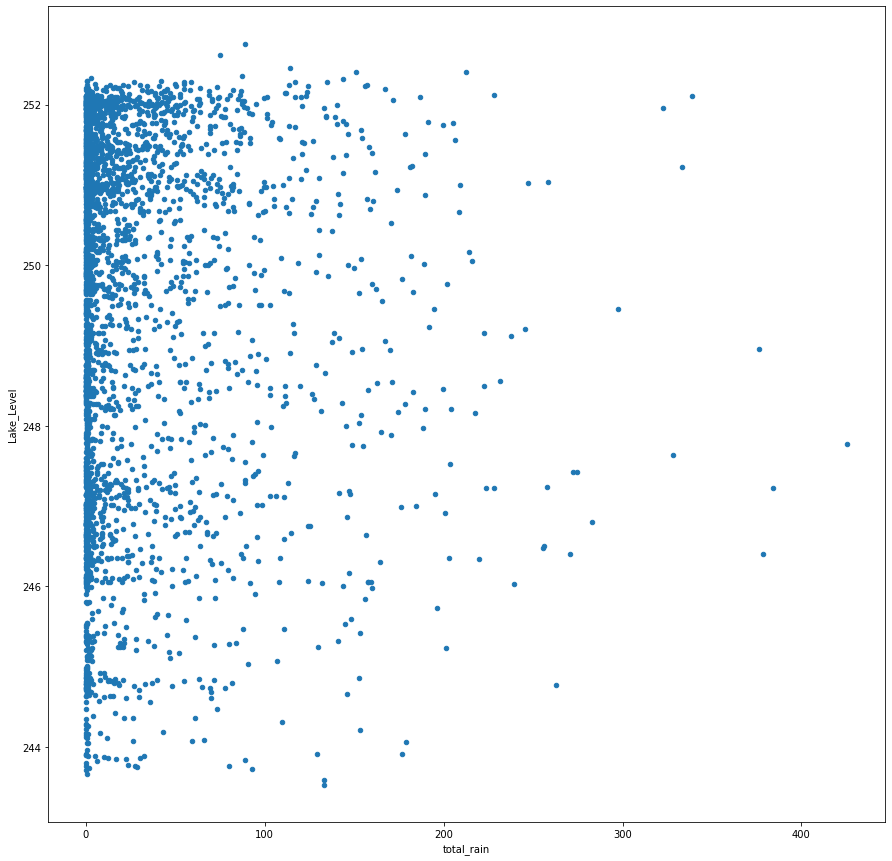

In [268]:
combined.plot(x='total_rain', y='Lake_Level', kind='scatter', figsize=(15,15))

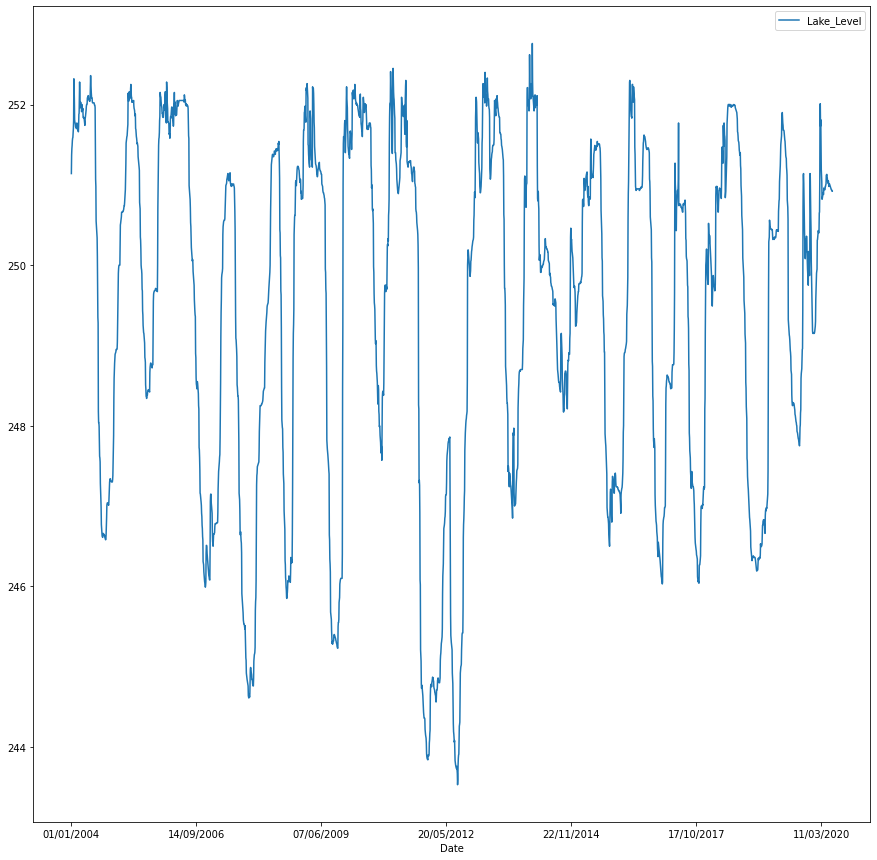

In [262]:
combined.plot(x='Date', y='Lake_Level', kind='line', figsize=(15,15))

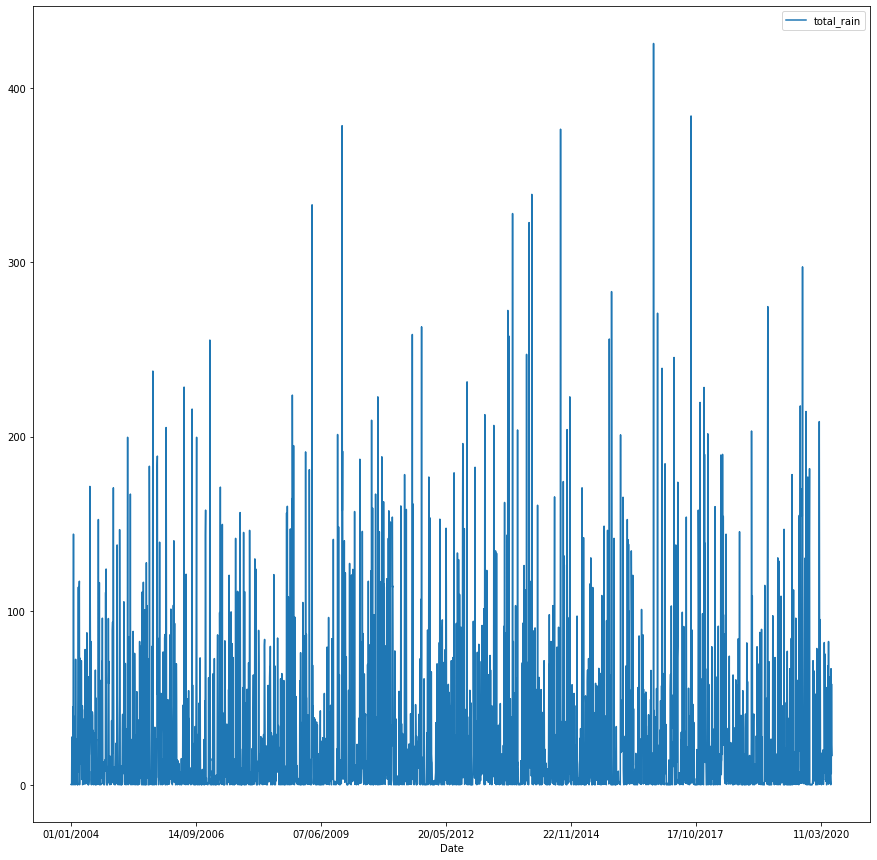

In [266]:
combined.plot(x='Date', y='total_rain', kind='line', figsize=(15,15))